# UFC "Guessing"

## Introduction

The Ultimate Fighting Championship (UFC) is an intense international competition where two fighters compete in mixed martial arts. Commonly before events, there is a lot of pre-fight talk where commentators compare fighters' personalities, fighting styles, and certain behaviors to hopefully place their accurate prediction. Countless people on Twitter, YouTube, and other social media also host their own livestreams and takes of their view.

Inside the octagon, people commonly say "anything can happen", suggesting the outcome between two fighters despite predictions can be hardly known. In this project, we would like to find the truth to the statement and hopefully identify certain patterns or behaviors to aid in UFC predictions.

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
file = open("./dataset/data.csv", "r")
df = pd.read_csv(file)
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


## Unsupervised Analysis

We will first take a look at the dataset to identify any missing values, as well as the features we are provided. Based on our goal, our target value is the "Winner".

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [4]:
df.shape

(6012, 144)

We have 6012 entries with 144 features

In [6]:
for i, j in zip(df.columns, df.isnull().sum()):
    print(i, j)

R_fighter 0
B_fighter 0
Referee 32
date 0
location 0
Winner 0
title_bout 0
weight_class 0
B_avg_KD 1427
B_avg_opp_KD 1427
B_avg_SIG_STR_pct 1427
B_avg_opp_SIG_STR_pct 1427
B_avg_TD_pct 1427
B_avg_opp_TD_pct 1427
B_avg_SUB_ATT 1427
B_avg_opp_SUB_ATT 1427
B_avg_REV 1427
B_avg_opp_REV 1427
B_avg_SIG_STR_att 1427
B_avg_SIG_STR_landed 1427
B_avg_opp_SIG_STR_att 1427
B_avg_opp_SIG_STR_landed 1427
B_avg_TOTAL_STR_att 1427
B_avg_TOTAL_STR_landed 1427
B_avg_opp_TOTAL_STR_att 1427
B_avg_opp_TOTAL_STR_landed 1427
B_avg_TD_att 1427
B_avg_TD_landed 1427
B_avg_opp_TD_att 1427
B_avg_opp_TD_landed 1427
B_avg_HEAD_att 1427
B_avg_HEAD_landed 1427
B_avg_opp_HEAD_att 1427
B_avg_opp_HEAD_landed 1427
B_avg_BODY_att 1427
B_avg_BODY_landed 1427
B_avg_opp_BODY_att 1427
B_avg_opp_BODY_landed 1427
B_avg_LEG_att 1427
B_avg_LEG_landed 1427
B_avg_opp_LEG_att 1427
B_avg_opp_LEG_landed 1427
B_avg_DISTANCE_att 1427
B_avg_DISTANCE_landed 1427
B_avg_opp_DISTANCE_att 1427
B_avg_opp_DISTANCE_landed 1427
B_avg_CLINCH_att 1

Based on the number of missing values and likely irrelevance to the match outcome, we decided on using the following features:

In [16]:
features = ["R_fighter", "B_fighter", "Winner", "weight_class", "R_Stance", "B_Stance", "R_Height_cms", "B_Height_cms", "R_Weight_lbs", "B_Weight_lbs", "R_age", "B_age"]
copy_df = df[features]
copy_df.head()

,R_fighter,B_fighter,Winner,weight_class,R_Stance,B_Stance,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_age,B_age
0,Adrian Yanez,Gustavo Lopez,Red,Bantamweight,Orthodox,Orthodox,170.18,165.10,135.0,135.0,27.0,31.0
1,Trevin Giles,Roman Dolidze,Red,Middleweight,Orthodox,Orthodox,182.88,187.96,185.0,205.0,28.0,32.0
2,Tai Tuivasa,Harry Hunsucker,Red,Heavyweight,Southpaw,Orthodox,187.96,187.96,264.0,241.0,28.0,32.0
3,Cheyanne Buys,Montserrat Conejo,Blue,WomenStrawweight,Switch,Southpaw,160.02,152.40,115.0,115.0,25.0,28.0
4,Marion Reneau,Macy Chiasson,Blue,WomenBantamweight,Orthodox,Orthodox,167.64,180.34,135.0,135.0,43.0,29.0


In [12]:
copy_df.isnull().sum()

R_fighter         0
B_fighter         0
Winner            0
weight_class      0
R_Stance         29
B_Stance         66
R_Height_cms      4
B_Height_cms     10
R_Weight_lbs      2
B_Weight_lbs      8
R_age            63
B_age           172
dtype: int64

## Delete?
Based on our calculations:

= (172 + 63 + 8 + 2 + 10 + 4 + 66 + 29) / 6012
= 0.05888223552894212

We decided in removing at most 5% of the data

In [20]:
# Remove entries with missing features
copy_df = copy_df.dropna()
copy_df.shape

(5753, 12)

In [49]:
copy_df.isnull().sum()

R_fighter       0
B_fighter       0
Winner          0
weight_class    0
R_Stance        0
B_Stance        0
R_Height_cms    0
B_Height_cms    0
R_Weight_lbs    0
B_Weight_lbs    0
R_age           0
B_age           0
dtype: int64

Our dataset now has 5753 entires with 12 features

In [27]:
copy_df.head()

,R_fighter,B_fighter,Winner,weight_class,R_Stance,B_Stance,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_age,B_age
0,Adrian Yanez,Gustavo Lopez,Red,Bantamweight,Orthodox,Orthodox,170.18,165.10,135.0,135.0,27.0,31.0
1,Trevin Giles,Roman Dolidze,Red,Middleweight,Orthodox,Orthodox,182.88,187.96,185.0,205.0,28.0,32.0
2,Tai Tuivasa,Harry Hunsucker,Red,Heavyweight,Southpaw,Orthodox,187.96,187.96,264.0,241.0,28.0,32.0
3,Cheyanne Buys,Montserrat Conejo,Blue,WomenStrawweight,Switch,Southpaw,160.02,152.40,115.0,115.0,25.0,28.0
4,Marion Reneau,Macy Chiasson,Blue,WomenBantamweight,Orthodox,Orthodox,167.64,180.34,135.0,135.0,43.0,29.0


We will take a look at the features and some of their characteristics.

In [21]:
for col in copy_df.columns:
    print(col)

R_fighter
B_fighter
Winner
weight_class
R_Stance
B_Stance
R_Height_cms
B_Height_cms
R_Weight_lbs
B_Weight_lbs
R_age
B_age


In [50]:
categorical_features = copy_df.select_dtypes(include=[np.object])
for col in categorical_features.columns:
    print(col)

R_fighter
B_fighter
Winner
weight_class
R_Stance
B_Stance


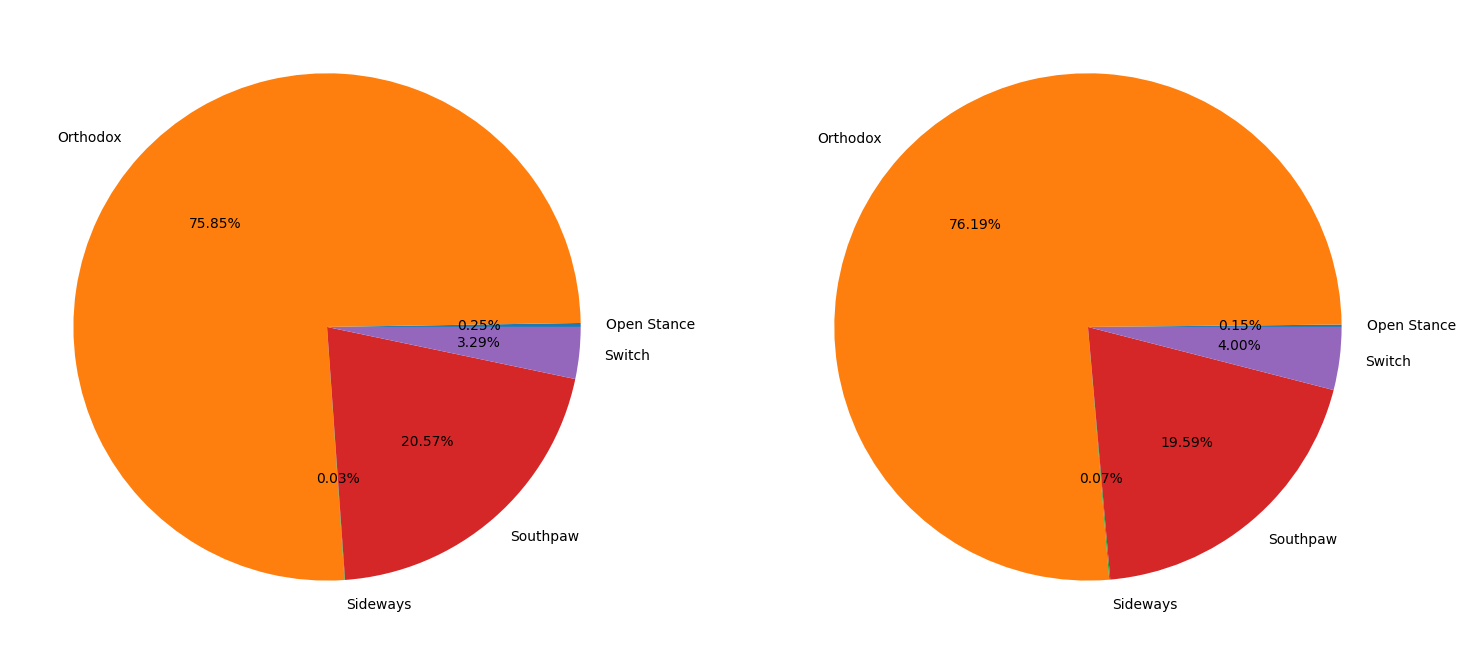

In [68]:
# TODO: combine the features? writeup on how most people are orthodox

fig, a = plt.subplots(ncols=2, figsize=(18, 9))

df.groupby('R_Stance').size().plot(kind='pie', autopct='%1.2f%%', ax=a[0])
df.groupby('B_Stance').size().plot(kind='pie', autopct='%1.2f%%', ax=a[1])

plt.show()

In [51]:
numerical_features = copy_df.select_dtypes(include=[np.number])
for col in numerical_features.columns:
    print(col)

R_Height_cms
B_Height_cms
R_Weight_lbs
B_Weight_lbs
R_age
B_age


In [52]:
copy_df.describe()

,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_age,B_age
count,5753.000000,5753.000000,5753.000000,5753.000000,5753.000000,5753.000000
mean,178.859621,178.857855,169.446550,169.217452,29.648705,29.307666
std,8.836520,8.705529,34.820211,34.902738,4.160026,4.066883
min,152.400000,152.400000,115.000000,115.000000,19.000000,18.000000
25%,172.720000,172.720000,145.000000,145.000000,27.000000,26.000000
50%,180.340000,180.340000,170.000000,170.000000,29.000000,29.000000
75%,185.420000,185.420000,185.000000,185.000000,32.000000,32.000000
max,210.820000,210.820000,345.000000,345.000000,47.000000,51.000000
